In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv("Mall_Customers.csv")

In [3]:
data.drop("CustomerID",axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3).fit(data)

In [9]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [10]:
result_df = data.copy()

In [11]:
result_df['labels'] =model.labels_

In [12]:
result_df.groupby('labels').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
labels,,,,
0,32.692308,86.538462,82.128205,0.461538
1,40.325203,44.154472,49.829268,0.406504
2,40.394737,87.000000,18.631579,0.526316


In [13]:
result_df['labels'].value_counts()

1    123
0     39
2     38
Name: labels, dtype: int64

In [14]:
distance = []

In [15]:
for i in range(2,11):
    model = KMeans(n_clusters=i).fit(data)    
    distance.append(model.inertia_)

In [16]:
distance

[212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331504,
 51145.004186663,
 45314.64093474091,
 40942.51117006116,
 37516.496623376624]

<AxesSubplot:>

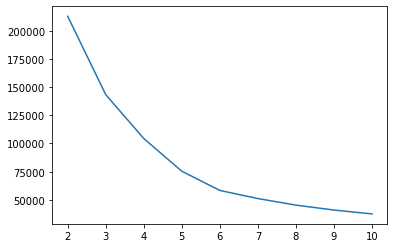

In [17]:
sns.lineplot(x=list(range(2,11)),y=distance)

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(data, model.labels_)

0.3759935477105866

In [20]:
sil = []
for i in range(2,11):
    model = KMeans(n_clusters=i).fit(data)    
    sil.append(silhouette_score(data, model.labels_))

In [21]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.44424291275274114,
 0.45205475380756527,
 0.4409411333609709,
 0.425945425758392,
 0.41494222767345024,
 0.3880908972219034]

<AxesSubplot:>

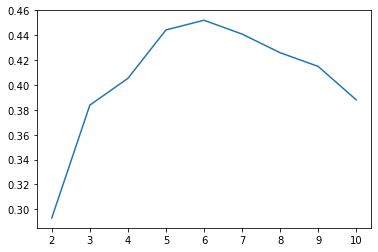

In [22]:
sns.lineplot(x=list(range(2,11)),y=sil)

In [23]:
model = KMeans(n_clusters=6).fit(data)
data['labels'] = model.labels_

In [24]:
data.groupby('labels').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
labels,,,,
0,56.155556,53.377778,49.088889,0.444444
1,32.692308,86.538462,82.128205,0.461538
2,41.685714,88.228571,17.285714,0.571429
3,25.272727,25.727273,79.363636,0.409091
4,44.142857,25.142857,19.523810,0.380952
5,27.000000,56.657895,49.131579,0.342105


<AxesSubplot:xlabel='labels', ylabel='Annual Income (k$)'>

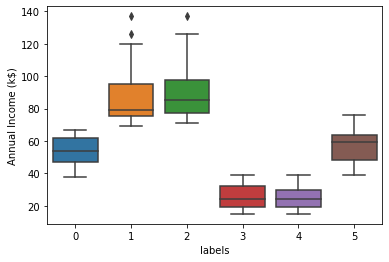

In [25]:
sns.boxplot(x='labels', y='Annual Income (k$)',data=data)

<AxesSubplot:xlabel='labels', ylabel='Age'>

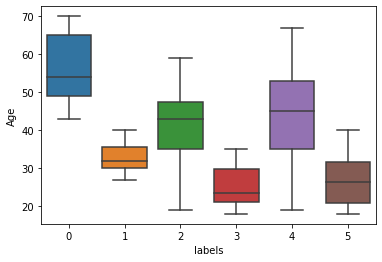

In [26]:
sns.boxplot(x='labels', y='Age',data=data)

<AxesSubplot:xlabel='labels', ylabel='Spending Score (1-100)'>

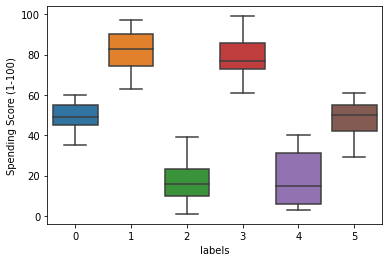

In [28]:
sns.boxplot(x='labels', y='Spending Score (1-100)',data=data)

In [29]:
data.drop('labels', axis=1, inplace=True)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components= 2)

In [32]:
pca.fit(data)

PCA(n_components=2)

In [33]:
pca_df = pca.transform(data)

In [37]:
pca_df = pd.DataFrame(pca_df, columns=['PC1','PC2'])

In [38]:
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

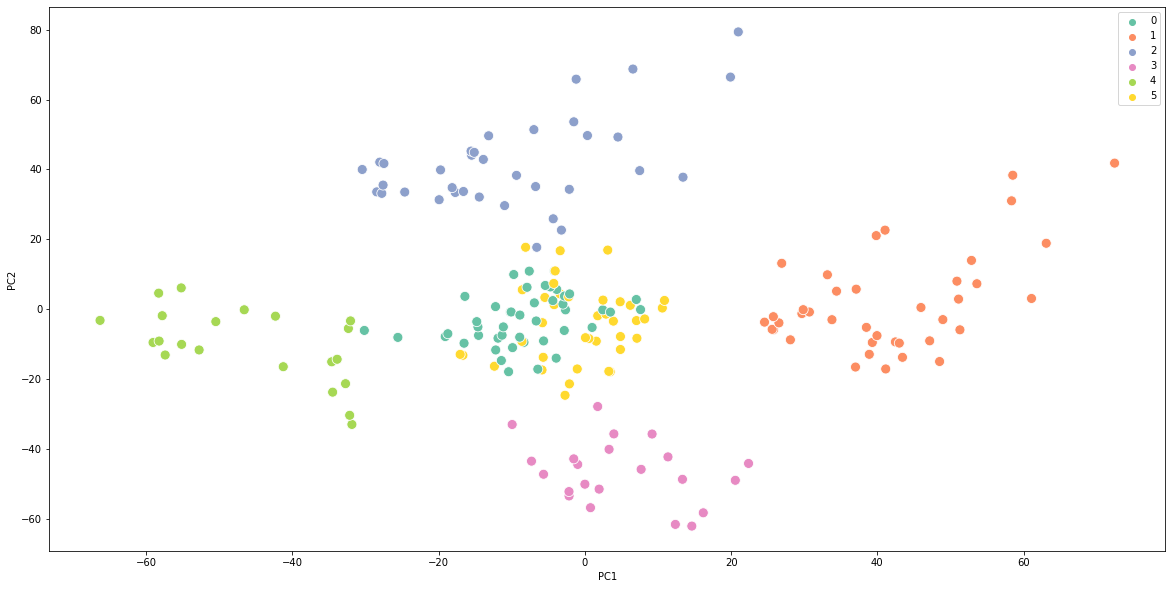

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=pca_df, x="PC1",y="PC2",hue = model.labels_, palette='Set2',s=100)